In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np

### Inputs

In [2]:
# Read observed sca
sca = pd.read_csv('PRMS_SCA', sep=' ', index_col=0)

In [3]:
# read PRMS sca
prms = pd.read_csv('../../model/results/nhru_summary.csvsnowcov_area.csv', sep=',', index_col=0)

In [4]:
# read modified shapefile
gdf = gpd.read_file('../../geospacial/PRMS_corrected_shapefile.shp')

### Analysis

In [5]:
# Rename the index name to None (no name)
prms.index.name = None
sca.index.name = None

In [6]:
# Set the headers to integers skipping the index header
prms.columns = prms.columns.astype(int)
sca.columns = sca.columns.astype(int)

In [7]:
# Convert index to datetime for hype DataFrame
prms.index = pd.to_datetime(prms.index)

# Convert index to datetime for sca DataFrame
sca.index = pd.to_datetime(sca.index)

In [8]:
# Trim hype DataFrame to have matching index as sca
prms = prms.reindex(sca.index)

In [9]:
prms

,1,2,3,4,5,6,7,8,9,10,...,900,901,902,903,904,905,906,907,908,909
2002-07-04,0.9841,0.8411,1.0,0.4343,1.0,1.0,1.0000,0.006796,1.0,0.03546,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2002-07-05,0.9722,0.8156,1.0,0.4112,1.0,1.0,1.0000,0.006130,1.0,0.03179,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2002-07-06,0.9518,0.7773,1.0,0.3834,1.0,1.0,0.9976,0.005447,1.0,0.02773,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2002-07-07,0.9020,0.7152,1.0,0.3330,1.0,1.0,0.9394,0.004485,1.0,0.02284,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2002-07-08,0.8243,0.6488,1.0,0.2852,1.0,1.0,0.8402,0.003646,1.0,0.01859,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-12-27,1.0000,1.0000,1.0,1.0000,1.0,1.0,1.0000,1.000000,1.0,1.00000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2015-12-28,1.0000,1.0000,1.0,1.0000,1.0,1.0,1.0000,1.000000,1.0,1.00000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2015-12-29,1.0000,1.0000,1.0,1.0000,1.0,1.0,1.0000,1.000000,1.0,1.00000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2015-12-30,1.0000,1.0000,1.0,1.0000,1.0,1.0,1.0000,1.000000,1.0,1.00000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [10]:
# Create a new DataFrame `difference` by subtracting `sca` from `hype`
# change this operation to whatever you want
difference= ((prms - sca) ** 2).mean()

In [11]:
difference

1      0.040742
2      0.045148
3      0.062020
4      0.110372
5      0.102468
         ...   
905    0.147297
906    0.149816
907    0.202276
908    0.169961
909    0.180539
Length: 909, dtype: float64

# Calculate the mean of each column in the difference DataFrame
column_means = difference.mean()

In [12]:
# Convert difference Series to a DataFrame
column_means_df = pd.DataFrame(difference, columns=['Mean'])

In [13]:
column_means_df

,Mean
1,0.040742
2,0.045148
3,0.062020
4,0.110372
5,0.102468
...,...
905,0.147297
906,0.149816
907,0.202276
908,0.169961


### Plot a heatmap

In [14]:
gdf

,nhm_id,model_hru_,geometry
0,95965,1,"POLYGON ((-113.46355 48.61646, -113.46592 48.6..."
1,95966,2,"POLYGON ((-113.52107 48.73869, -113.51718 48.7..."
2,95968,3,"POLYGON ((-113.69379 48.77102, -113.69365 48.7..."
3,95969,4,"POLYGON ((-113.69379 48.77102, -113.69439 48.7..."
4,95970,5,"POLYGON ((-113.69365 48.77101, -113.69379 48.7..."
...,...,...,...
904,96139,53,"POLYGON ((-113.06368 49.35959, -113.05747 49.3..."
905,96959,549,"POLYGON ((-112.72767 48.96689, -112.72705 48.9..."
906,96978,568,"POLYGON ((-112.77188 48.99852, -112.77132 48.9..."
907,97007,597,"POLYGON ((-112.94677 48.95766, -112.94804 48.9..."


In [15]:
# Merge column_means_df onto gdf by the index in column_means_df and seg_nhm column in gdf
merged_gdf = gdf.merge(column_means_df, left_on='model_hru_', right_index=True)

In [16]:
merged_gdf

,nhm_id,model_hru_,geometry,Mean
0,95965,1,"POLYGON ((-113.46355 48.61646, -113.46592 48.6...",0.040742
1,95966,2,"POLYGON ((-113.52107 48.73869, -113.51718 48.7...",0.045148
2,95968,3,"POLYGON ((-113.69379 48.77102, -113.69365 48.7...",0.062020
3,95969,4,"POLYGON ((-113.69379 48.77102, -113.69439 48.7...",0.110372
4,95970,5,"POLYGON ((-113.69365 48.77101, -113.69379 48.7...",0.102468
...,...,...,...,...
904,96139,53,"POLYGON ((-113.06368 49.35959, -113.05747 49.3...",0.108601
905,96959,549,"POLYGON ((-112.72767 48.96689, -112.72705 48.9...",0.117968
906,96978,568,"POLYGON ((-112.77188 48.99852, -112.77132 48.9...",0.112737
907,97007,597,"POLYGON ((-112.94677 48.95766, -112.94804 48.9...",0.093907


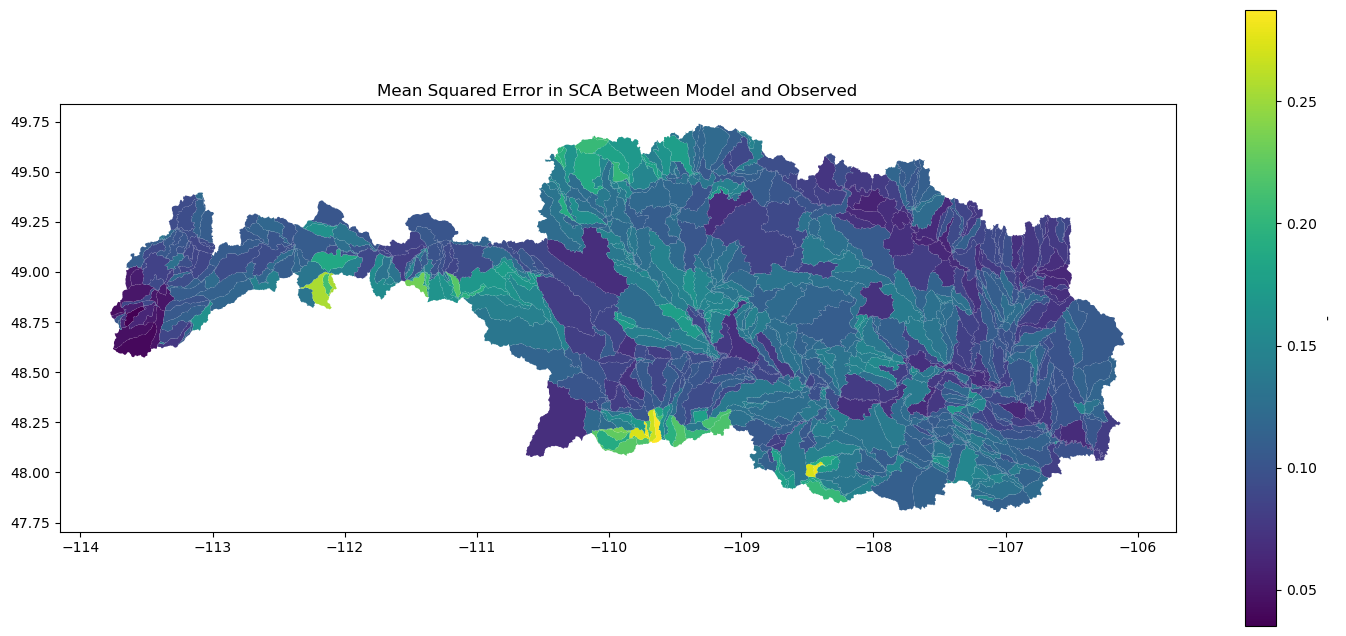

In [17]:
# Plot a heatmap of the 'Mean' column with adjusted figure size
ax = merged_gdf.plot(column='Mean', cmap='viridis', legend=True, figsize=(18, 8))

# Add title to the plot
ax.set_title('Mean Squared Error in SCA Between Model and Observed')

# Get the color bar instance
cbar = ax.get_figure().get_axes()[1]

# Add units to the color bar
cbar.set_ylabel('-')

# Save the plot as PNG to a specific location
plt.savefig('../../model/plots/sca.png')

# Show the plot
plt.show()

### MSE

In [18]:
# Align the indices and columns
common_index = prms.index.intersection(sca.index)
common_columns = prms.columns.intersection(sca.columns)

# Extract the common data
prms_common = prms.loc[common_index, common_columns]
sca_common = sca.loc[common_index, common_columns]

# Calculate mean squared error
mse = ((prms_common - sca_common) ** 2).mean().mean()

# Print the mean squared error
print("Mean Squared Error:", mse)

Mean Squared Error: 0.11841682174137319
